In [1]:
%reload_ext autoreload
%autoreload 2
from CaliPytion.tools.standardcurve import StandardCurve

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
f = lambda x, a: a * x
concentrations = np.linspace(0, 10, 40)

rand = lambda size: np.random.normal(1, 0.01, size)


signals = f(concentrations, 0.5) + rand(len(concentrations))

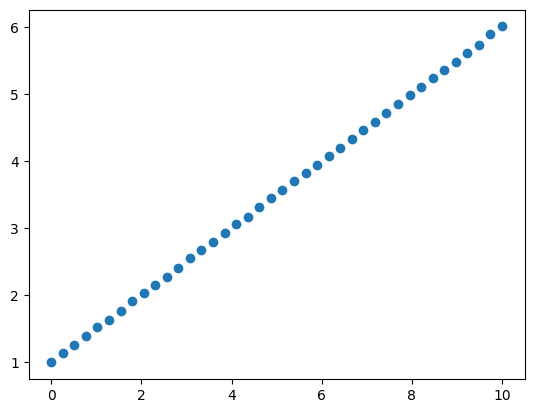

In [4]:
plt.scatter(concentrations, signals)

In [5]:
standard = StandardCurve(
    concentrations=concentrations,
    signals=signals,
    conc_unit="mmol / l",
    analyte_name="ABTS",
    wavelength=420,
)
print(standard.result_dict)

# standard.visualize()

Standard curve data was blanked.
{'3rd degree polynominal': -369.1177368898756, 'Rational': -365.49537972705025, 'Quadratic': -365.4869326226728, 'Linear': -364.6400633796093}


In [6]:
standard.visualize()

# .from_excel

In [7]:
path = "/Users/max/Documents/enzymeml/glucosidase_inhibition/round2/data/p-NP_standard.xlsx"
standard = Calibration.from_excel(
    path=path,
    reactant_id="s1",
    wavelength=340,
    concentration_unit="mmole / l",
    temperature=37,
    temperature_unit="C",
    pH=7,
    sheet_name="csv",
)

NameError: name 'Calibration' is not defined

In [ ]:
cal = Calibration.from_excel(
    path=path,
    reactant_id="s1",
    wavelength=340,
    concentration_unit="mmole / l",
    temperature=37,
    temperature_unit="C",
    pH=7,
    sheet_name="csv",
)

stand = StandardCurve.from_datamodel(cal, cutoff_signal=3.3)
stand.visualize()

AttributeError: type object 'Calibration' has no attribute 'from_excel'

In [ ]:
stand.calculate_concentration(np.array([0.4, 0.6, 1, 3]))

NameError: name 'stand' is not defined